# MODELOS DE PREDICCIÓN

### Modelos de prueba con los datos random

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar los datos
data = pd.read_excel("./BD_data/data/df_usuarios_ayudas.xlsx")

# Preprocesamiento de datos
label_encoder = LabelEncoder()
data["Subcategoria_numerica"] = label_encoder.fit_transform(data["subcategoria"])  # Transformar la variable objetivo en valores numéricos
features = data[["Edad", "Sexo", "Ciudad"]]
target = data["Subcategoria_numerica"]

# Codificar variables categóricas
features_encoded = pd.get_dummies(features)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Crear el modelo de clasificación
clf = RandomForestClassifier()

# Entrenar el modelo
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}".format(accuracy))


Precisión del modelo: 0.14


Error cuadrático medio (MSE): 6.88


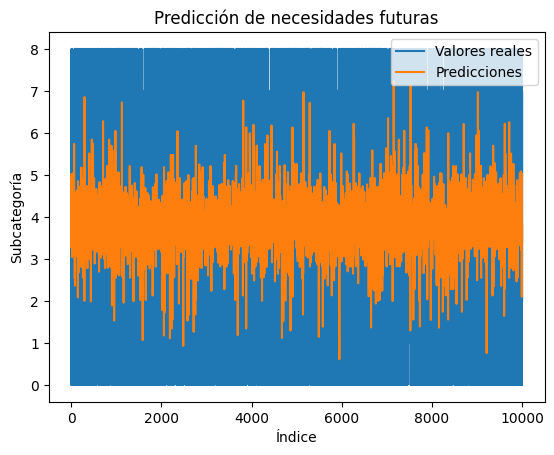

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_excel("./BD_data/data/df_usuarios_ayudas.xlsx")) 

# Preprocesamiento de datos
label_encoder = LabelEncoder()
data["Subcategoria_numerica"] = label_encoder.fit_transform(data["subcategoria"])  # Transformar la variable objetivo en valores numéricos
data["Fecha"] = pd.to_datetime(data["fecha"])
data["Anio"] = data["Fecha"].dt.year
data["Mes"] = data["Fecha"].dt.month
features = data[["Anio", "Mes", "Ciudad"]]
target = data["Subcategoria_numerica"]

# Codificar variables categóricas
features_encoded = pd.get_dummies(features)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Crear el modelo de regresión
regressor = RandomForestRegressor()

# Entrenar el modelo
regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = regressor.predict(X_test)

# Evaluar el modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE): {:.2f}".format(mse))

# Visualizar las predicciones
plt.plot(y_test.values, label="Valores reales")
plt.plot(y_pred, label="Predicciones")
plt.xlabel("Índice")
plt.ylabel("Subcategoría")
plt.title("Predicción de necesidades futuras")
plt.legend()
plt.show()


C:\Users\arrat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Coeficiente de silueta promedio: 0.511972727542345


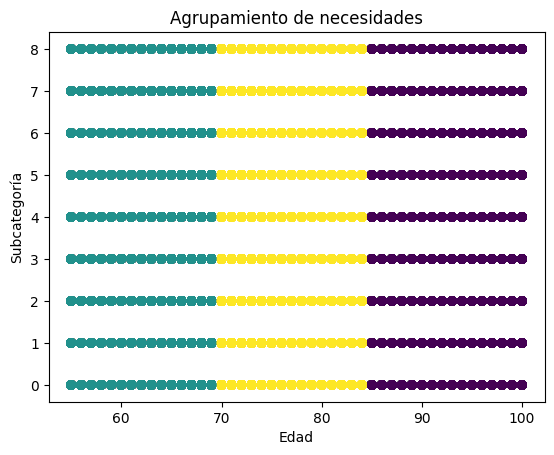

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

data = pd.read_excel("./BD_data/data/df_usuarios_ayudas.xlsx") 

# Preprocesamiento de datos
label_encoder = LabelEncoder()
data["Subcategoria_numerica"] = label_encoder.fit_transform(data["subcategoria"])  # Transformar la variable objetivo en valores numéricos
features = data[["Edad", "Sexo", "Subcategoria_numerica"]]

# Codificar variables categóricas
features_encoded = pd.get_dummies(features)

# Aplicar el algoritmo de K-means
kmeans = KMeans(n_clusters=3)  # Especifica el número de clusters que deseas
kmeans.fit(features_encoded)

# Obtener las etiquetas de los grupos
labels = kmeans.labels_

# Evaluar la calidad del agrupamiento utilizando el coeficiente de silueta
silhouette_avg = silhouette_score(features_encoded, labels)
print("Coeficiente de silueta promedio:", silhouette_avg)

# Agregar las etiquetas de los grupos al DataFrame original
data["Grupo"] = labels

# Visualizar los resultados
plt.scatter(data["Edad"], data["Subcategoria_numerica"], c=labels)
plt.xlabel("Edad")
plt.ylabel("Subcategoría")
plt.title("Agrupamiento de necesidades")
plt.show()
